In [10]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
parent_folder = "./ml_exercise_therapanacea"

# original image folder and data labels documents
original_folder = os.path.join(parent_folder, "train_img")
labels_file = os.path.join(parent_folder, "label_train.txt")

# Read labels into a list
with open(labels_file, "r") as f:
    labels = [int(line.strip()) for line in f]
label_counts = Counter(labels)

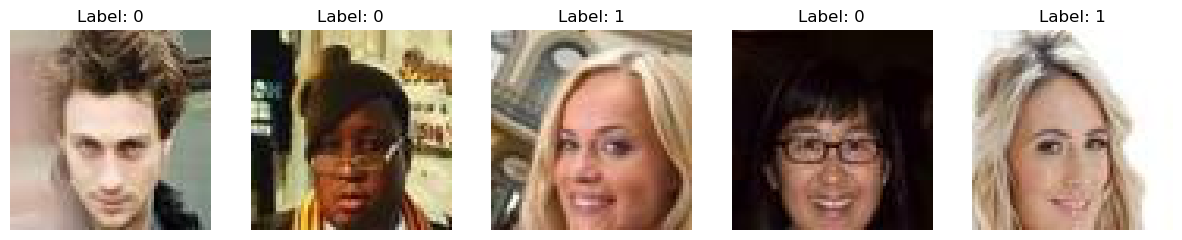

In [23]:
image_files = [f"{i+1:06d}.jpg" for i in range(len(labels))]
k = 480
sample_images = image_files[k:k+5]

plt.figure(figsize=(15, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(original_folder, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Label: {labels[i+k]}")
    plt.axis('off')

plt.show()


### Visual analysis
Visually, it is challenging to discern the relationship between the labels and the images, yet.



In [ ]:
label_counts = Counter(labels)
print(f"labels counter: {label_counts}")

#### Dataset Imbalance
We are working with a binary dataset that is highly imbalanced, with the positive labels being seven times more frequent than the negative labels.

To properly evaluate the model, we will split the dataset into training and testing sets, ensuring that the test set is balanced (see `split_dataset` module). Additionally, during training, we will apply weighted sampling to account for the imbalance in the dataset.

In [24]:
# run this cell to split the original dataset into train/test dataset as described above.
!python split_dataset.py

100%|█████████████████████████████████| 100000/100000 [00:15<00:00, 6278.52it/s]


The folder structure is now this one   


In [25]:
#| dataset  
#|   |---- train 
#|           |---- 0
#|              |---- 0*****.jpg
#|              |---- 0*****.jpg
#|           |---- 1
#|              |---- 0*****.jpg
#|              |---- 0*****.jpg
#|   |---- test 
#|           |---- 0
#|              |---- 0*****.jpg
#|              |---- 0*****.jpg
#|           |---- 1
#|              |---- 0*****.jpg
#|              |---- 0*****.jpg

#### Dataloader
 We will use a dataset loader to load the dataset. During the training we will sample from the dataset while taking in account the imbalanceness if the data, we will also augment the data by mirroring and rotating within a fixed range the images. Further more we will be applying some blurring.

#### Model
We will use a state-of-the-art classifier model: ViT (Vision Transformer), a transformer-based architecture. We will initialize its weights using the publicly available pre-trained weights from Hugging Face and fine-tune the model using our training dataset.

The images will be resized to 224x224 to match the dimensions used in the original ViT training dataset.

In [27]:
!train_model.py

zsh:1: command not found: train_model.py
